In [36]:
# Import libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})

# Show the first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Check shape and data types
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# Basic statistics
print("\nSummary statistics:\n")
print(df.describe())


Shape of dataset: (150, 5)

Data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Summary statistics:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%       

In [5]:
# Check for any missing data
print("Missing values:\n")
print(df.isnull().sum())


Missing values:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

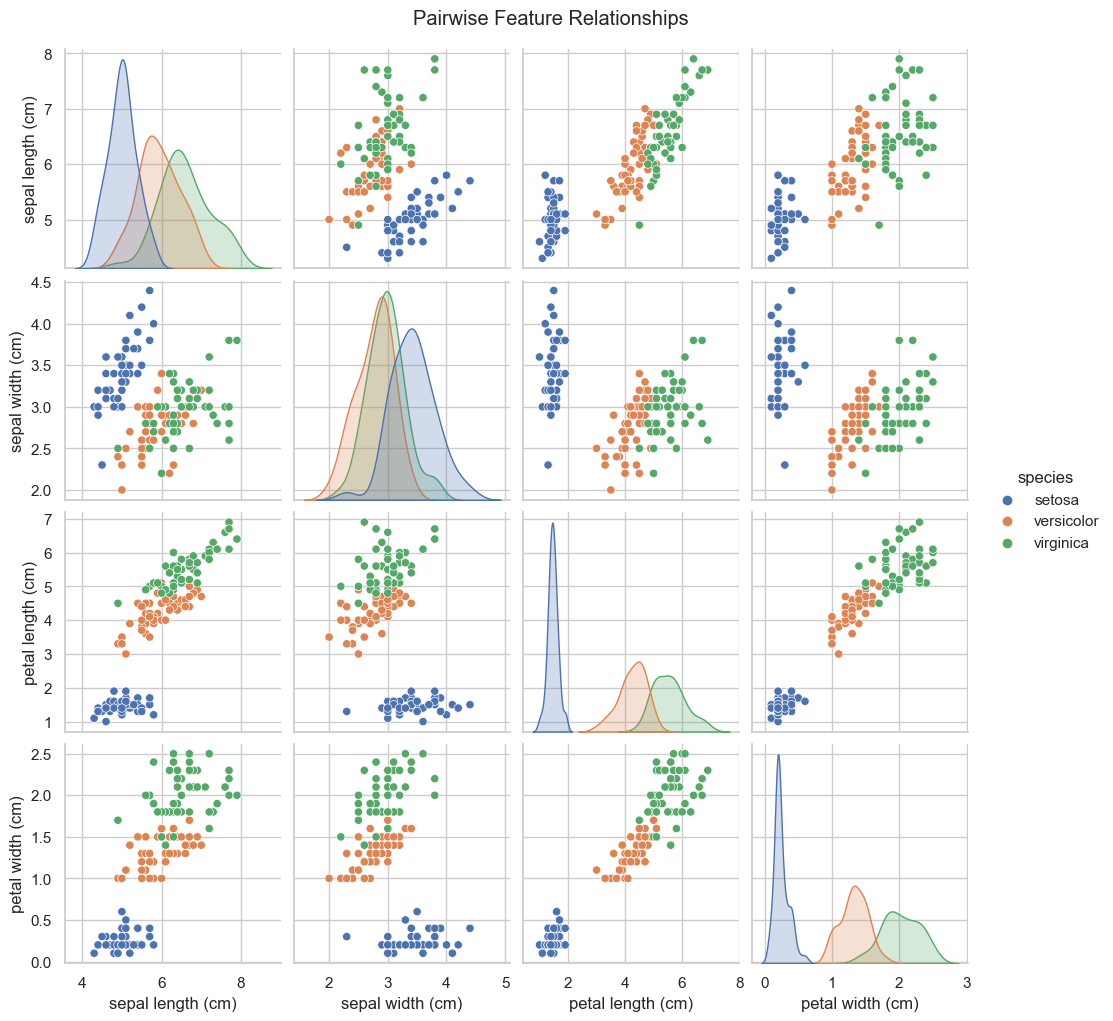

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme
sns.set(style="whitegrid")

# Pairplot for visualizing feature relationships
sns.pairplot(df, hue='species')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df.drop('species', axis=1)
y = df['species']

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (105, 4)
Testing set shape: (45, 4)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 1.00

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



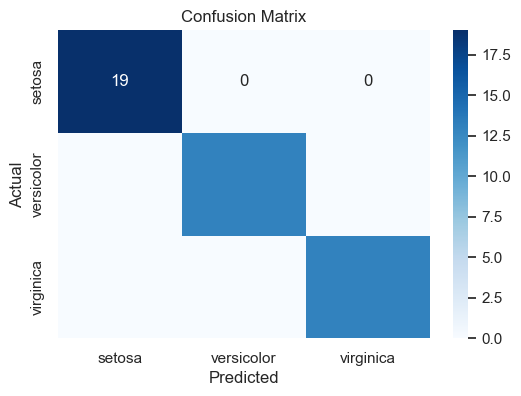

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Create a DataFrame for test results
test_results = X_test.copy()
test_results['True_Species'] = y_test.values
test_results['Predicted_Species'] = y_pred
test_results['Correct_Prediction'] = test_results['True_Species'] == test_results['Predicted_Species']

# Save to CSV file
test_results.to_csv('iris_classification_report.csv', index=True)

print("Final report saved as 'iris_classification_report.csv'")


Final report saved as 'iris_classification_report.csv'


In [26]:
import pandas as pd

# Your new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]

# Convert to DataFrame with correct column names
new_sample_df = pd.DataFrame(new_sample, columns=iris.feature_names)

# Predict
predicted_species = model.predict(new_sample_df)

# Since your model outputs species names directly, print it:
print("Predicted species:", predicted_species[0])


Predicted species: setosa


In [28]:
import pandas as pd

# Your new sample
new_sample = [[5.8, 2.7, 3.9, 1.2]]

# Convert to DataFrame with correct column names
new_sample_df = pd.DataFrame(new_sample, columns=iris.feature_names)

# Predict
predicted_species = model.predict(new_sample_df)

# Since your model outputs species names directly, print it:
print("Predicted species:", predicted_species[0])


Predicted species: versicolor


In [32]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()

# Convert to DataFrame for easy viewing
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Show the first 10 rows
print(df.head(150))


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se